# Linear Regression (and polynomial Regression)

>[Linear Regression (and polynomial Regression)](#scrollTo=QyZ-7jUzCQ9L)

>[Dataset](#scrollTo=tp5Dd6ljeLjg)

>[EDA and Visualizations](#scrollTo=DgN82w_vr3e5)

>>[univariate analysis](#scrollTo=HXiFsvhN8IEA)

>>>[Histogram](#scrollTo=bgJ_FskQgO1u)

>>[Multivariate Analysis](#scrollTo=hxHTCr7c83Wq)

>>>[Scatter plot](#scrollTo=OXy8vH9vgSpg)

>>>[Pairplot](#scrollTo=lHP9Ln0ggXHc)

>>>[Heat map](#scrollTo=O_qnaN-VgbF9)

>>>[Box plot](#scrollTo=XHXIbIgImCff)

>[Preprocessing Data](#scrollTo=aQM-PL0_pRgW)

>>>[Drop/ Imputing missing value](#scrollTo=1MKC8P4I-HLR)

>>>[Handling categorical data](#scrollTo=mrnIzIuph65u)

>>>[Split Data](#scrollTo=QArEGcX4i7tW)

>[Fit Linear Model](#scrollTo=rgVoUI0ziPeS)

>[Model Evaluation](#scrollTo=tgyOnr0bnRxp)

>[Multivariate polynomial regression](#scrollTo=ASEDM9q_hu6q)

>[Regularigation](#scrollTo=bFjuzngjyY3y)

>>>[Ridge Regression](#scrollTo=HE-jUapWn7Mk)

>>>[Lasso Regression](#scrollTo=YJh62LkzrT9I)



# Dataset

# EDA and Visualizations

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/content/drive/MyDrive/MANISH_TOPIC WISE_IPYNB/reference_or _dataset/linear regression/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [17]:
df.shape

(1338, 7)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [20]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## univariate analysis

1. identify if dataset contains outliers

2. identify if need data transformation or feature engineering (like log transformation etc)



### Histogram

<ipython-input-21-9052dcb4e7d5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'],kde=True)


<Axes: xlabel='charges', ylabel='Density'>

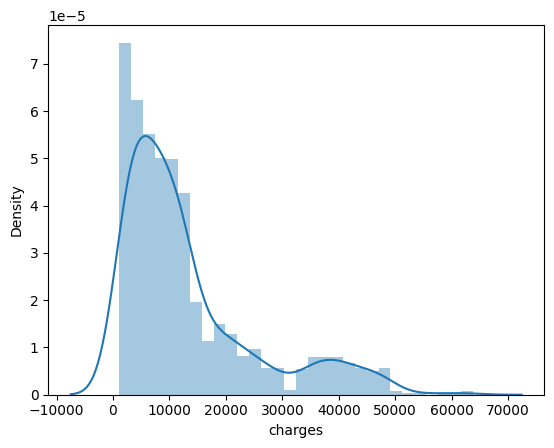

In [21]:
#to plot histograms
sns.distplot(df['charges'],kde=True)


The charges column is skewed, # this probably means we should take the log to normalize the data

which means that log transformation is required as a step of feature engineering step, to convert it to normal distribution.

## Multivariate Analysis

### Scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

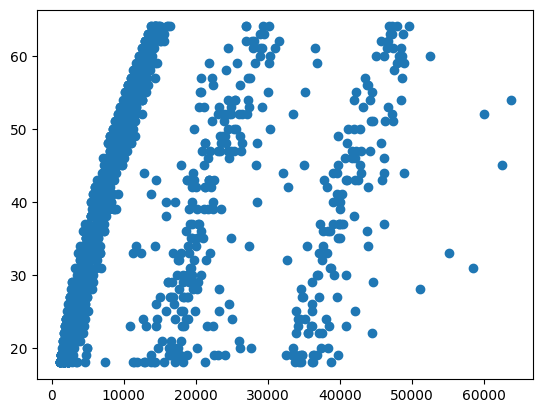

In [22]:
plt.scatter(x=df["charges"], y=df["age"])
plt.show

### Pairplot

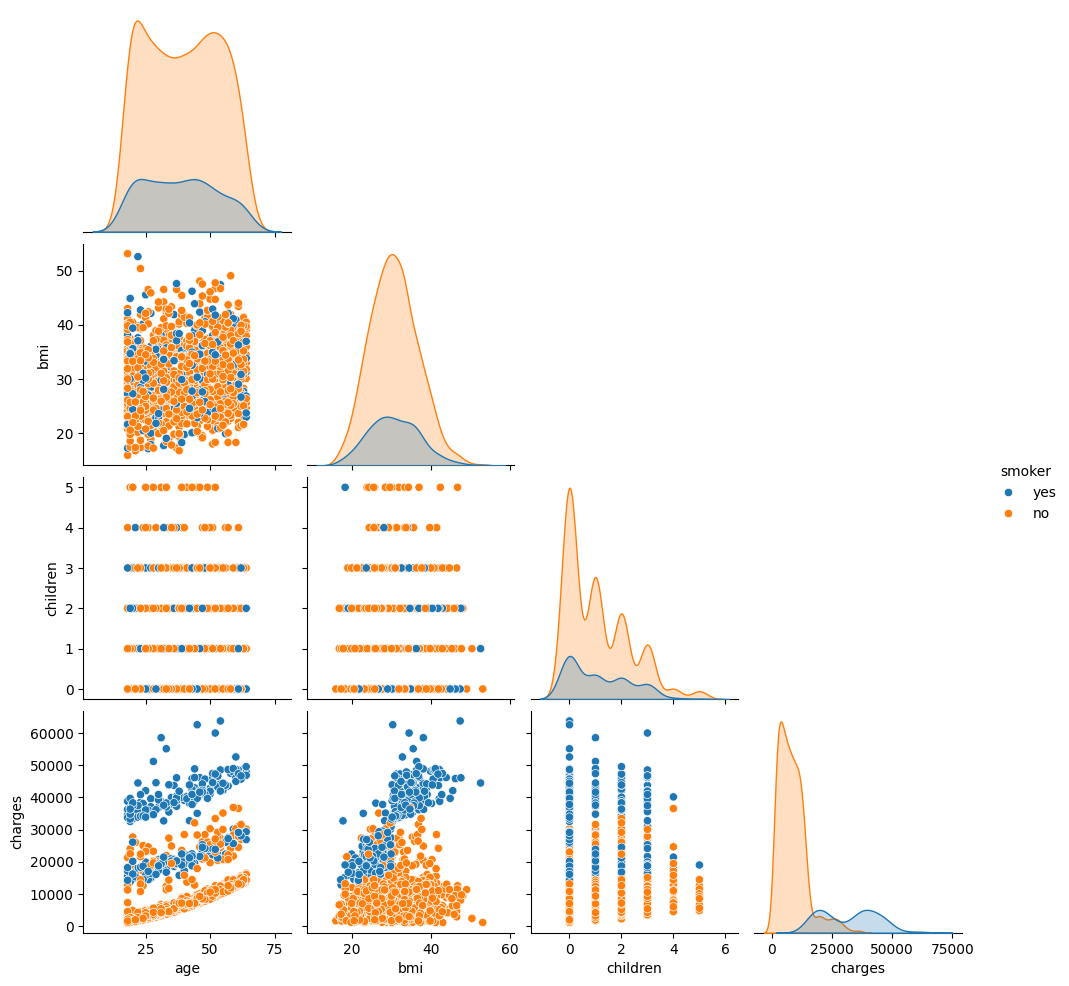

In [23]:
sns.pairplot(df, hue="smoker" ,corner=True)


we can observe that smokers (blue color) have distinctively higher medical expenses. It indicates that the feature "smoker" can potentially be a strong predictor of expenses.

### Heat map

<ipython-input-24-da767c1714f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='cool')  # Note only numerical variables are contained in the heatmap so smoker, region is left


<Axes: >

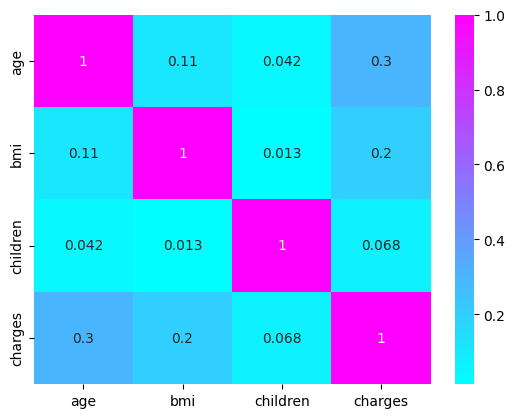

In [24]:
 sns.heatmap(df.corr(), annot=True, cmap='cool')  # Note only numerical variables are contained in the heatmap so smoker, region is left
 # here heat map is again plot after one hot encoding

### Box plot




<Axes: xlabel='age'>

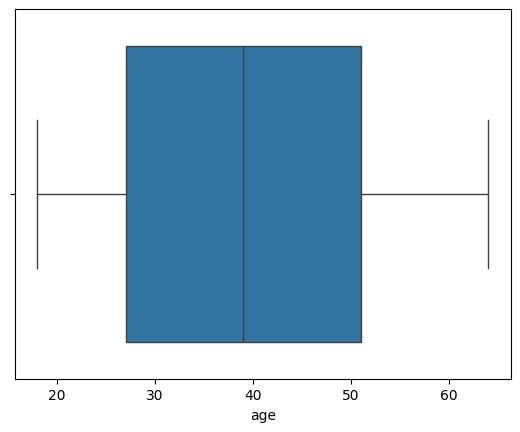

In [25]:
sns.boxplot(x=df["age"])

<Axes: >

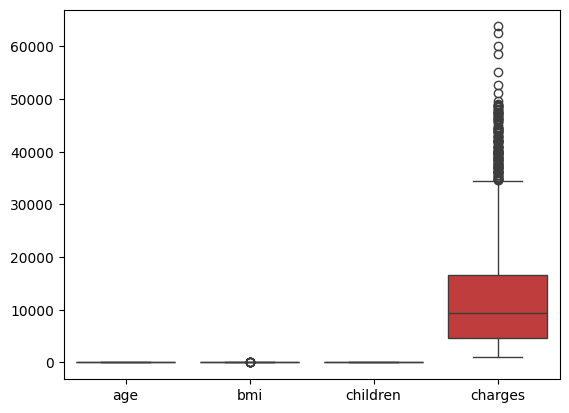

In [26]:
sns.boxplot(df) # not use full as the scale are different for feature variables

<Axes: xlabel='smoker', ylabel='charges'>

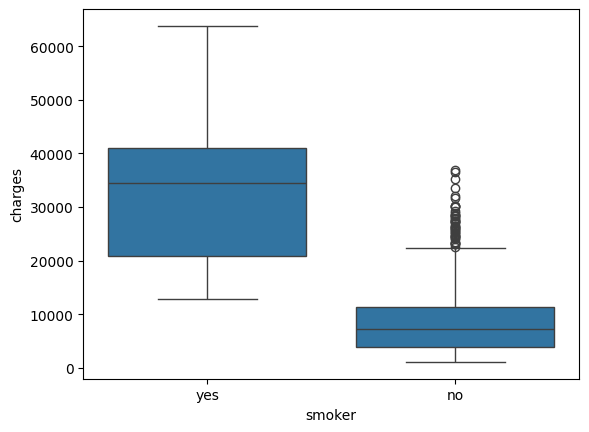

In [27]:
sns.boxplot(x=df["smoker"],y=df["charges"])

# Preprocessing Data

### Drop/ Imputing missing value

In [28]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA with some cool graphs :) First we'll see how the charges are distributed according to given factors

### Handling categorical data







In [29]:
oneHotCols=["sex","smoker","region"]
df=pd.get_dummies(df, columns=oneHotCols, drop_first=True) # drop_first  Whether to get k-1 dummies out of k categorical levels by removing the first level.
df.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<Axes: >

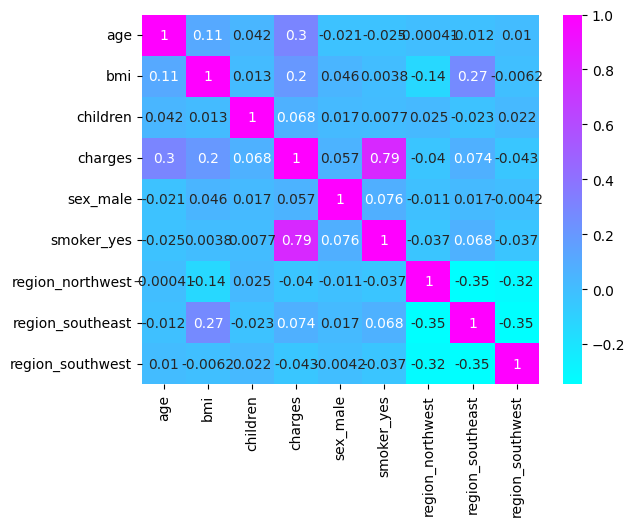

In [30]:
 sns.heatmap(df.corr(), annot=True, cmap='cool')

NOTE : only numerical variables are contained in the heatmap.
so it is done after one hot encoding.

correlation analysis

* **Multicollinearity** identify collinearity between independent variables - linear regression assumes no collinearity among independent features, therefore it is essential to drop some features if collinearity exists. In this example, none of the independent variables are highly correlated with each other, hence no need of dropping any.

* identify independent variables that are strongly correlated with the target - they are the strong predictors. Once again, we can see that "smoker" is correlated with expenses.

### Split Data

In [31]:
# lets build our linear model
# independant variables
X = df.drop('charges', axis=1)
# the dependent variable
y = df[['charges']]

In [32]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(936, 8)
(402, 8)
(936, 1)
(402, 1)


# Fit Linear Model

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.coef_

array([[  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
        24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866]])

In [58]:
X_train.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [70]:
coefficients = [  251.68186515,   322.38910684,   344.9642553 ,  -282.79634661,
        24059.39047692,  -304.09009765,  -939.34209691,  -868.18855866]

feature_names = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest']



In [71]:
# Create a DataFrame with coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

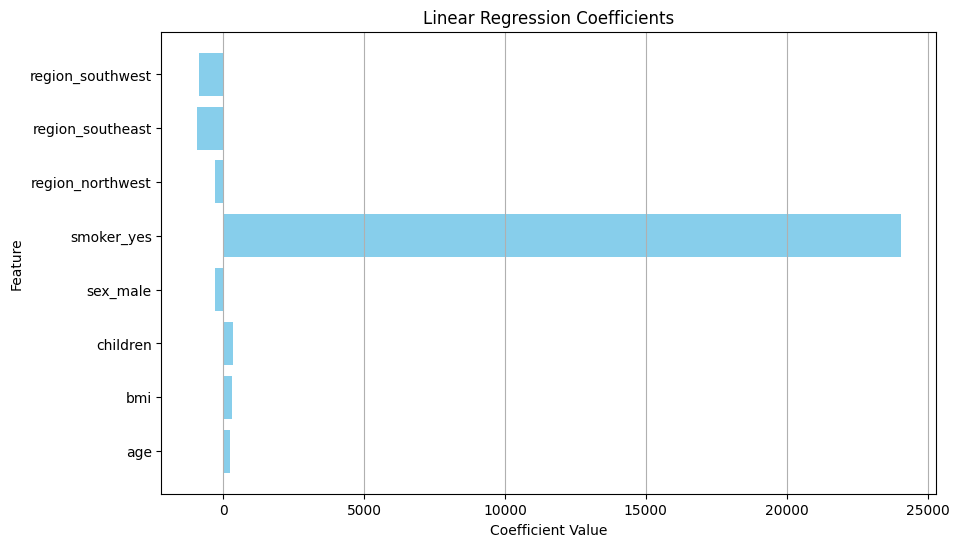

In [72]:
# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Linear Regression Coefficients')
plt.grid(axis='x')
plt.show()

In [37]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -11039.23841856155


# Model Evaluation

Linear regression model can be qualitatively evaluated by visualizing error distribution. There are also quantitative measures such as MAE, MSE, RMSE and R squared.

In [74]:
##Predicting the charges
y_test_pred= regression_model.predict(X_test)

In [75]:
##Evaluating the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 4139.932064766009
Mean Squared Error: 36761456.352013245
Root Mean Squared Error: 6063.122656850449


3. R Squared - coefficient of determination



In [76]:
model.score(X_train, y_train)

0.7545557492633161

In [77]:
#out of sample score (R^2)

model.score(X_test, y_test)

0.7405989316927213

In this case, a R squared value of 0.74 indicating that the model explains 74%  of variation in target variable, which is generally considered as a good rate but not at the level of overfitting.

# Multivariate polynomial regression

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#print(y_pred)

#In sample (training) R^2 will always improve with the number of variables!
print(poly_clf.score(X_train2, y_train))

0.843127394365768


In [83]:
#Out off sample (testing) R^2 is our measure of sucess and does improve
print(poly_clf.score(X_test2, y_test))

0.8385892342346704


In [84]:
# but this improves as the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(936, 8)
(936, 37)


Polynomial Features (with only interaction terms) have improved the Out of sample R^2. However at the cost of increaing the number of variables significantly

# Regularigation




###  Ridge Regression


In [45]:
# Import the necessary libraries
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [46]:
# Create a Ridge regression object
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter to control regularization strength
# Fit the model to the training data
ridge.fit(X_train_scaled, y_train)
# Predict on the test data
y_test_pred = ridge.predict(X_test_scaled)
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 4141.1608401438725
Mean Squared Error: 36759757.17134083
Root Mean Squared Error: 6062.9825310106935


In [47]:
print(ridge.coef_)

[[3525.366009   1959.62807189  421.08281735 -140.39675527 9723.29025083
  -128.88515356 -412.59006991 -377.92407251]]


In [48]:
#In sample (training) R^2 will always improve with the number of variables!
print(ridge.score(X_train_scaled, y_train))

0.7545548833690586


### Lasso Regression

In [49]:
from sklearn.linear_model import Lasso
# Create a Lasso regression object
lasso = Lasso(alpha=1.0)  # You can adjust the alpha parameter to control regularization strength
# Fit the model to the training data
lasso.fit(X_train_scaled, y_train)
# Predict on the test data
y_test_pred = lasso.predict(X_test_scaled)
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 4139.744831607436
Mean Squared Error: 36763448.11947369
Root Mean Squared Error: 6063.28690723717


In [50]:
#In sample (training) R^2 will always improve with the number of variables!
print(lasso.score(X_train_scaled, y_train))

0.7545556394260982
